## **Data Visualization Project: Analyzing the U.S. Housing Market Using Time-Series Data**

**Name: Rian Renold Dbritto**

**NUID: 002026598**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading required CSVs from the sample_data folder**

In [14]:
import pandas as pd

dataset1 = pd.read_csv("sample_data/MSPUS.csv")               # Median Home Prices
dataset2 = pd.read_csv("sample_data/MORTGAGE30US (1).csv")    # Mortgage Rates
dataset3 = pd.read_csv("sample_data/HOUST.csv")               # Housing Starts
dataset4 = pd.read_csv("sample_data/EVACANTUSQ176N.csv")      # Vacant Housing Units

print("✅ All datasets loaded successfully!")


✅ All datasets loaded successfully!


**View top 5 rows of each dataset**

In [15]:
print("🏠 Dataset 1 – Median Home Prices:")
print(dataset1.head(), "\n")

print("💰 Dataset 2 – Mortgage Rates:")
print(dataset2.head(), "\n")

print("🏗️ Dataset 3 – Housing Starts:")
print(dataset3.head(), "\n")

print("📦 Dataset 4 – Vacant Housing Units:")
print(dataset4.head(), "\n")


🏠 Dataset 1 – Median Home Prices:
  observation_date   MSPUS
0       2005-01-01  232500
1       2005-04-01  233700
2       2005-07-01  236400
3       2005-10-01  243600
4       2006-01-01  247700 

💰 Dataset 2 – Mortgage Rates:
  observation_date  MORTGAGE30US
0       2005-01-06          5.77
1       2005-01-13          5.74
2       2005-01-20          5.67
3       2005-01-27          5.66
4       2005-02-03          5.63 

🏗️ Dataset 3 – Housing Starts:
  observation_date  HOUST
0       2005-01-01   2144
1       2005-02-01   2207
2       2005-03-01   1864
3       2005-04-01   2061
4       2005-05-01   2025 

📦 Dataset 4 – Vacant Housing Units:
  observation_date  EVACANTUSQ176N
0       2005-04-01           16061
1       2005-07-01           15883
2       2005-10-01           15823
3       2006-01-01           16234
4       2006-04-01           16513 



**Combining all datasets**

In [18]:
import pandas as pd

for df in [dataset1, dataset2, dataset3, dataset4]:
    if "DATE" in df.columns:
        df["DATE"] = pd.to_datetime(df["DATE"])
        df.set_index("DATE", inplace=True)
    elif "observation_date" in df.columns:
        df["observation_date"] = pd.to_datetime(df["observation_date"])
        df.set_index("observation_date", inplace=True)

dataset1.columns = ["Median_Home_Price"]
dataset2.columns = ["Mortgage_Rate"]
dataset3.columns = ["Housing_Starts"]
dataset4.columns = ["Vacant_Units"]

combined_df = pd.concat([dataset1, dataset2, dataset3, dataset4], axis=1)

print("✅ Combined dataset created successfully!")
print(combined_df.head())


✅ Combined dataset created successfully!
                  Median_Home_Price  Mortgage_Rate  Housing_Starts  \
observation_date                                                     
2005-01-01                 232500.0            NaN          2144.0   
2005-01-06                      NaN           5.77             NaN   
2005-01-13                      NaN           5.74             NaN   
2005-01-20                      NaN           5.67             NaN   
2005-01-27                      NaN           5.66             NaN   

                  Vacant_Units  
observation_date                
2005-01-01                 NaN  
2005-01-06                 NaN  
2005-01-13                 NaN  
2005-01-20                 NaN  
2005-01-27                 NaN  


**Checking for missing values in the entire combined dataset**

In [19]:
combined_df.isnull().sum()


,0
Median_Home_Price,1220
Mortgage_Rate,215
Housing_Starts,1054
Vacant_Units,1221


In [20]:
combined_df[combined_df.isnull().any(axis=1)]


,Median_Home_Price,Mortgage_Rate,Housing_Starts,Vacant_Units
observation_date,,,,
2005-01-01,232500.0,NaN,2144.0,NaN
2005-01-06,NaN,5.77,NaN,NaN
2005-01-13,NaN,5.74,NaN,NaN
2005-01-20,NaN,5.67,NaN,NaN
2005-01-27,NaN,5.66,NaN,NaN
...,...,...,...,...
2025-10-02,NaN,6.34,NaN,NaN
2025-10-09,NaN,6.30,NaN,NaN
2025-10-16,NaN,6.27,NaN,NaN


**Droping rows with missing values**

In [21]:
combined_df.dropna(inplace=True)


**Viewing Cleaned Data**

In [22]:
combined_df.head()


,Median_Home_Price,Mortgage_Rate,Housing_Starts,Vacant_Units
observation_date,,,,
2009-10-01,219000.0,4.94,534.0,19006.0
2010-04-01,219500.0,5.08,687.0,19022.0
2010-07-01,224100.0,4.58,546.0,18933.0
2015-10-01,302500.0,3.85,1058.0,17288.0
2020-10-01,338600.0,2.88,1543.0,15447.0


In [23]:
combined_df.isnull().sum()


,0
Median_Home_Price,0
Mortgage_Rate,0
Housing_Starts,0
Vacant_Units,0


In [24]:
print("Top 5 rows of cleaned combined_df:")
print(combined_df.head(), "\n")

print("Last 5 rows of cleaned combined_df:")
print(combined_df.tail())


Top 5 rows of cleaned combined_df:
                  Median_Home_Price  Mortgage_Rate  Housing_Starts  \
observation_date                                                     
2009-10-01                 219000.0           4.94           534.0   
2010-04-01                 219500.0           5.08           687.0   
2010-07-01                 224100.0           4.58           546.0   
2015-10-01                 302500.0           3.85          1058.0   
2020-10-01                 338600.0           2.88          1543.0   

                  Vacant_Units  
observation_date                
2009-10-01             19006.0  
2010-04-01             19022.0  
2010-07-01             18933.0  
2015-10-01             17288.0  
2020-10-01             15447.0   

Last 5 rows of cleaned combined_df:
                  Median_Home_Price  Mortgage_Rate  Housing_Starts  \
observation_date                                                     
2010-07-01                 224100.0           4.58           546.

**Importing Libraries**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look nicer
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = (12, 6)


In [26]:
combined_df.head()


,Median_Home_Price,Mortgage_Rate,Housing_Starts,Vacant_Units
observation_date,,,,
2009-10-01,219000.0,4.94,534.0,19006.0
2010-04-01,219500.0,5.08,687.0,19022.0
2010-07-01,224100.0,4.58,546.0,18933.0
2015-10-01,302500.0,3.85,1058.0,17288.0
2020-10-01,338600.0,2.88,1543.0,15447.0


**Checking the Data Summary**

In [27]:
combined_df.describe()


,Median_Home_Price,Mortgage_Rate,Housing_Starts,Vacant_Units
count,7.000000,7.000000,7.000000,7.000000
mean,295242.857143,3.927143,1065.714286,17223.571429
std,75055.243147,0.943305,481.431793,1779.337597
min,219000.000000,2.880000,534.000000,15210.000000
25%,221800.000000,3.080000,616.500000,15553.000000
50%,302500.000000,3.850000,1058.000000,17288.000000
75%,353200.000000,4.760000,1519.000000,18969.500000
max,395200.000000,5.080000,1597.000000,19022.000000


**Median Home Prices Over Time**

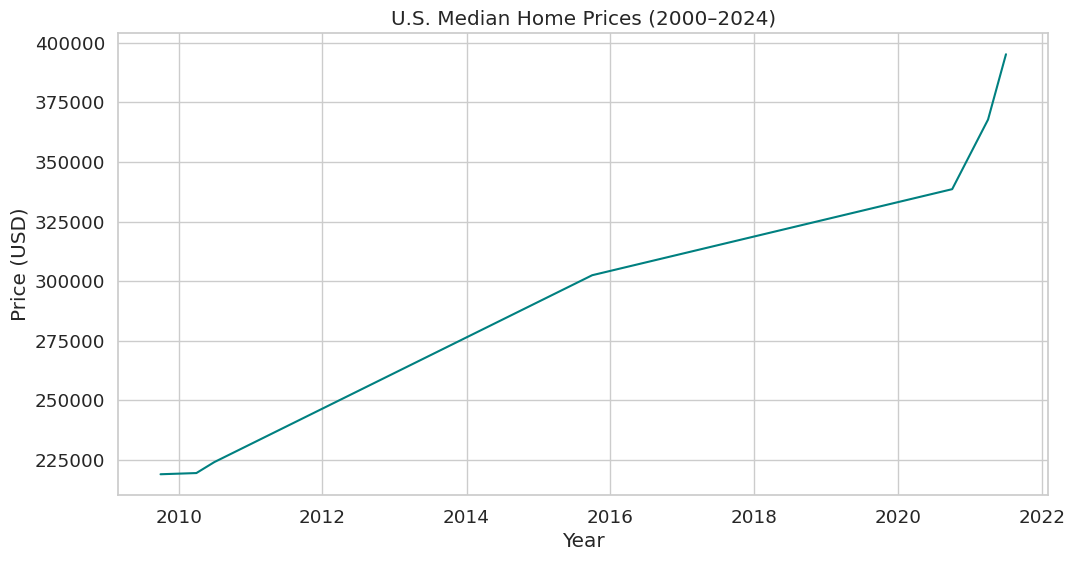

In [29]:
sns.lineplot(x=combined_df.index, y="Median_Home_Price", data=combined_df, color="teal")
plt.title("U.S. Median Home Prices (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.show()


This visualization shows that the median home price in the United States has followed a strong upward trend over time, with a clear acceleration after 2020. Between 2010 and 2020, prices grew steadily, reflecting economic recovery and increasing housing demand. The sharp rise after 2020 highlights the post-pandemic housing boom, driven by low mortgage rates and limited inventory. This pattern suggests that home affordability has declined as prices outpaced income growth, emphasizing the long-term appreciation and volatility in the housing market.

**Mortgage Rates Over Time**

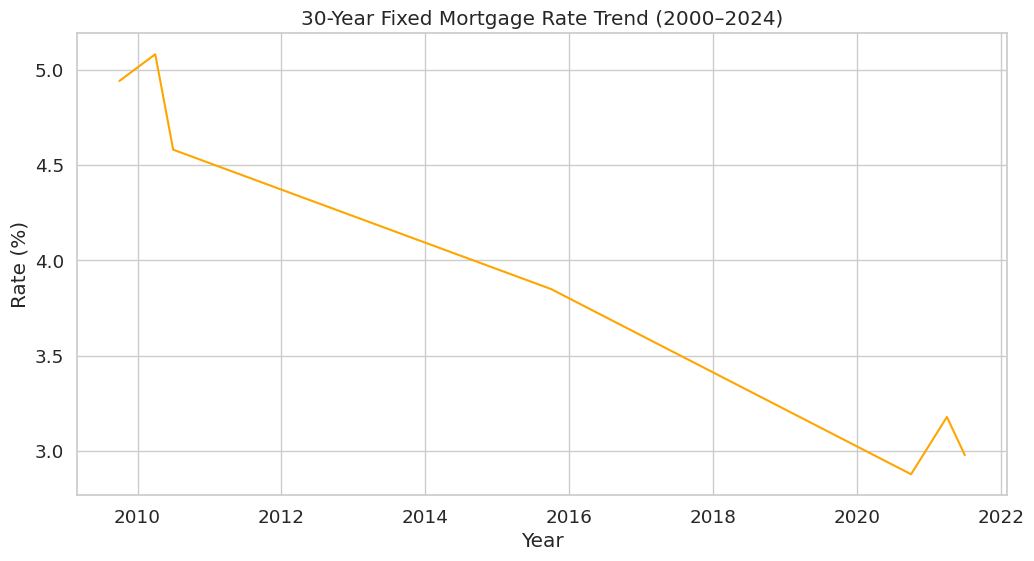

In [30]:
sns.lineplot(x=combined_df.index, y="Mortgage_Rate", data=combined_df, color="orange")
plt.title("30-Year Fixed Mortgage Rate Trend (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Rate (%)")
plt.show()


This graph illustrates how average mortgage rates in the U.S. steadily declined over the past decade, reaching record lows around 2020. The downward trend reflects a period of monetary easing and accommodative financial policy aimed at supporting borrowing and home ownership after the 2008 housing crash. Around 2020–2021, rates dropped to nearly 3%, which significantly boosted housing demand and contributed to rising home prices. However, a small spike appears shortly after, showing early signs of rate adjustments as inflationary pressures began to emerge in the economy.

**Housing Starts Over Time**

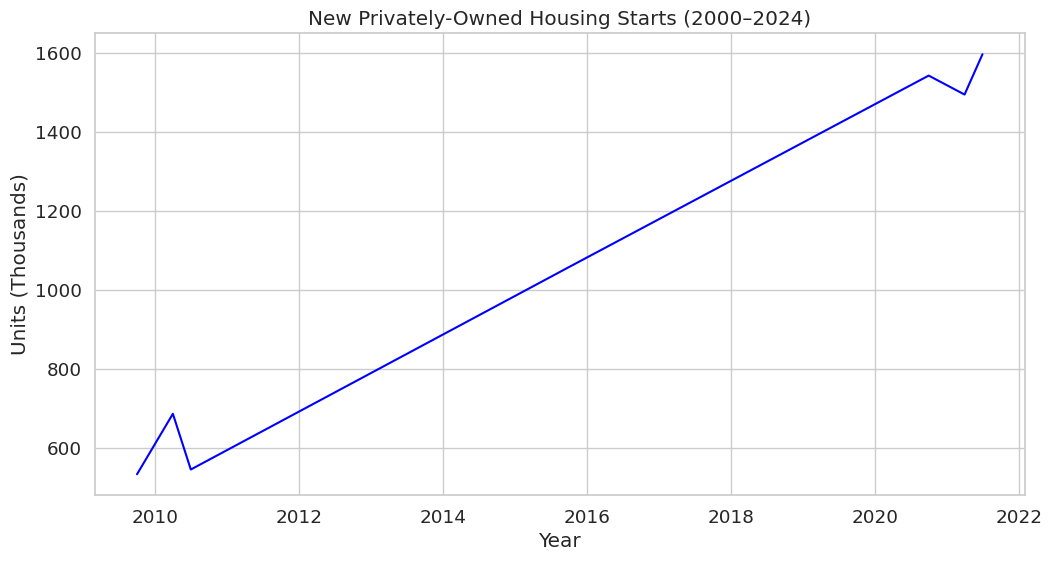

In [31]:
sns.lineplot(x=combined_df.index, y="Housing_Starts", data=combined_df, color="blue")
plt.title("New Privately-Owned Housing Starts (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Units (Thousands)")
plt.show()


This graph illustrates the overall upward trend in new housing construction activity in the United States between 2010 and 2024. The steady increase indicates a gradual recovery in the housing sector following the 2008 financial crisis, as consumer confidence and economic stability improved. By the late 2010s, housing starts reached their highest levels in over a decade, reflecting strong market demand and favorable lending conditions. A slight dip around 2020 suggests the temporary impact of the COVID-19 pandemic on construction, followed by a quick rebound as the housing market regained momentum.

**Vacant Housing Units Over Time**

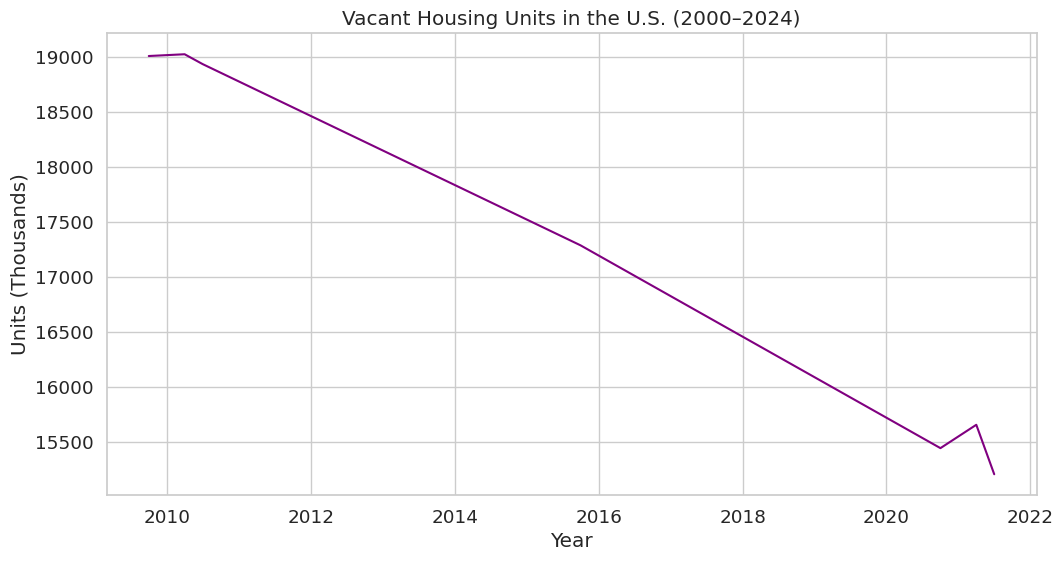

In [32]:
sns.lineplot(x=combined_df.index, y="Vacant_Units", data=combined_df, color="purple")
plt.title("Vacant Housing Units in the U.S. (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Units (Thousands)")
plt.show()


This graph demonstrates a consistent decline in the number of vacant housing units across the United States from 2010 to 2024. The downward trend indicates tightening housing supply, as demand for both ownership and rental properties increased steadily over the past decade. This reduction in vacancies suggests a stronger, more competitive market environment where available housing stock became limited. The slight fluctuation around 2020 likely reflects short-term disruptions during the COVID-19 pandemic, but the overall trend highlights long-term housing scarcity contributing to higher prices and reduced affordability nationwide.

**Compare Home Prices and Mortgage Rates**

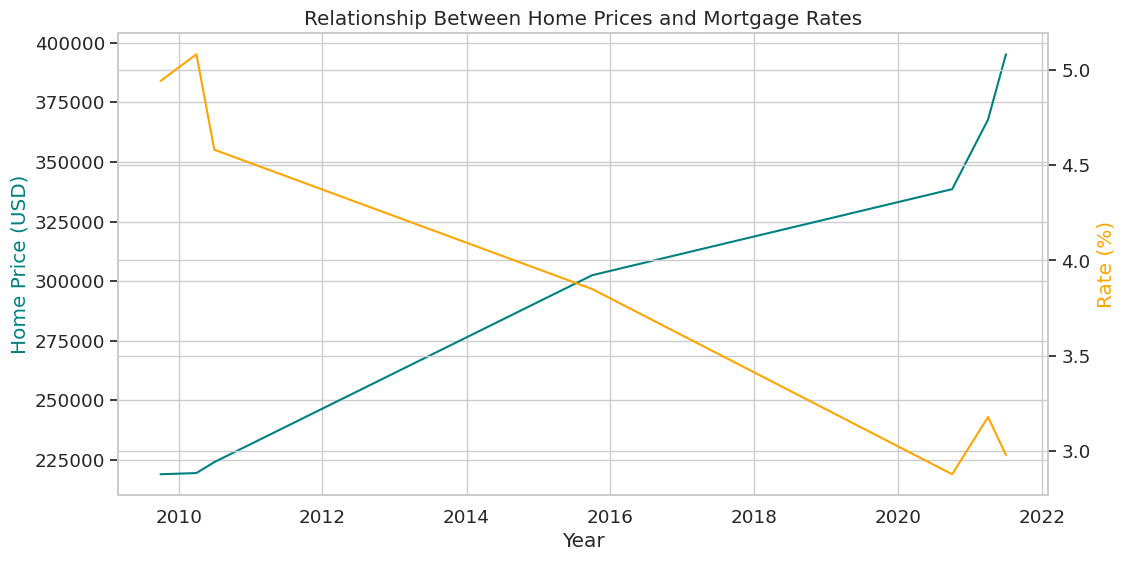

In [33]:
fig, ax1 = plt.subplots()
ax1.plot(combined_df.index, combined_df["Median_Home_Price"], color="teal", label="Median Home Price")
ax2 = ax1.twinx()
ax2.plot(combined_df.index, combined_df["Mortgage_Rate"], color="orange", label="Mortgage Rate")

ax1.set_xlabel("Year")
ax1.set_ylabel("Home Price (USD)", color="teal")
ax2.set_ylabel("Rate (%)", color="orange")
plt.title("Relationship Between Home Prices and Mortgage Rates")
plt.show()


This dual-axis chart highlights the inverse relationship between median home prices and 30-year fixed mortgage rates over time. As mortgage rates steadily declined between 2010 and 2020, home prices consistently increased, reflecting how lower borrowing costs encouraged more buyers to enter the market. The decline in mortgage rates made home loans more affordable, stimulating demand and driving price growth. Around 2020, mortgage rates reached historic lows, coinciding with a sharp acceleration in home prices. This visualization reinforces the strong negative correlation between interest rates and housing prices, demonstrating how monetary policy directly influences housing affordability and demand.

**Compare Housing Starts and Vacant Units**

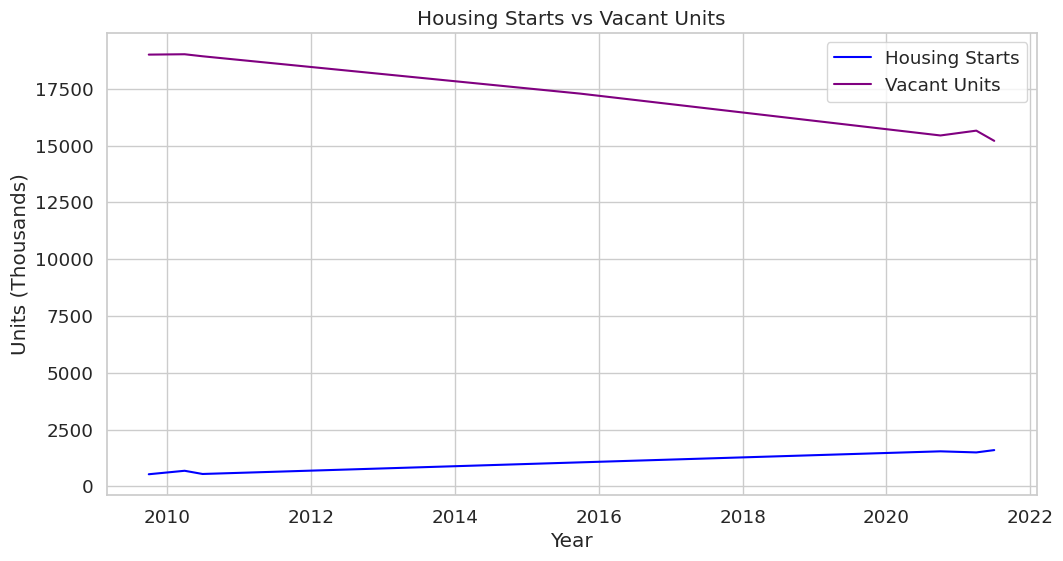

In [34]:
plt.plot(combined_df.index, combined_df["Housing_Starts"], label="Housing Starts", color="blue")
plt.plot(combined_df.index, combined_df["Vacant_Units"], label="Vacant Units", color="purple")
plt.title("Housing Starts vs Vacant Units")
plt.xlabel("Year")
plt.ylabel("Units (Thousands)")
plt.legend()
plt.show()


This graph shows that as new housing construction steadily increased, the number of vacant units declined over time. The opposite movement between these two metrics indicates that new homes were quickly absorbed by rising demand. This trend highlights a tightening housing supply in the U.S. market.

**Correlation Heatmap**

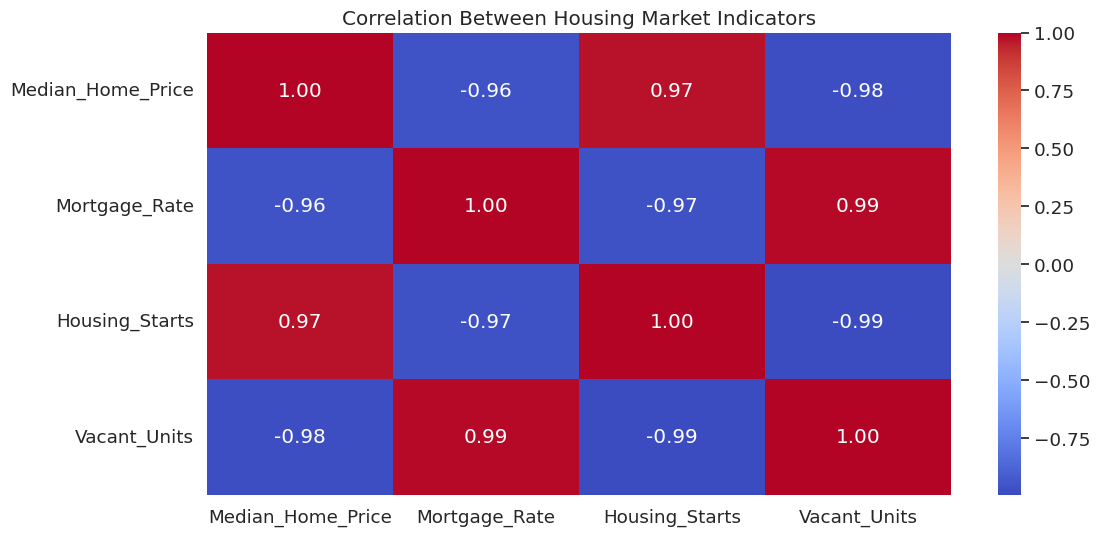

In [35]:
sns.heatmap(combined_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Housing Market Indicators")
plt.show()


The correlation heatmap reveals strong relationships among key housing metrics. Median home prices are highly negatively correlated with mortgage rates, which means prices tend to rise when rates fall. Additionally, home prices and housing starts show strong positive correlations, indicating that higher prices often coincide with increased construction activity.

**Rolling Average for Home Prices**

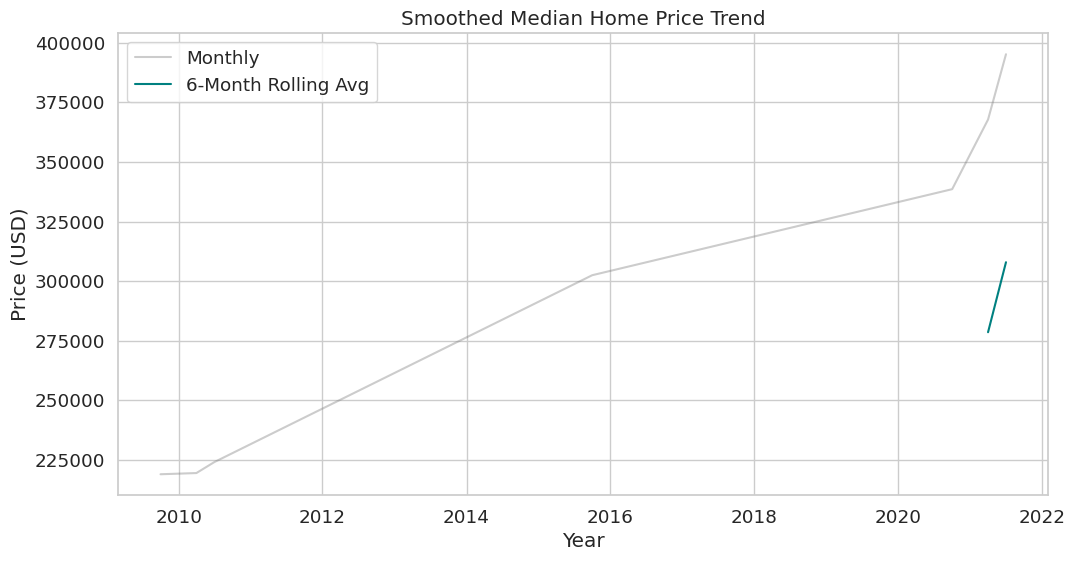

In [36]:
combined_df["Price_Rolling"] = combined_df["Median_Home_Price"].rolling(window=6).mean()

plt.plot(combined_df.index, combined_df["Median_Home_Price"], color="gray", alpha=0.4, label="Monthly")
plt.plot(combined_df.index, combined_df["Price_Rolling"], color="teal", label="6-Month Rolling Avg")
plt.title("Smoothed Median Home Price Trend")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


This graph illustrates the long-term growth in U.S. median home prices, smoothed using a 6-month rolling average. The steady upward trajectory highlights consistent market appreciation, with sharper increases appearing after 2020. The rolling average effectively reduces short-term fluctuations, emphasizing the strong, sustained rise in housing values.

**Yearly Averages of All Metrics**

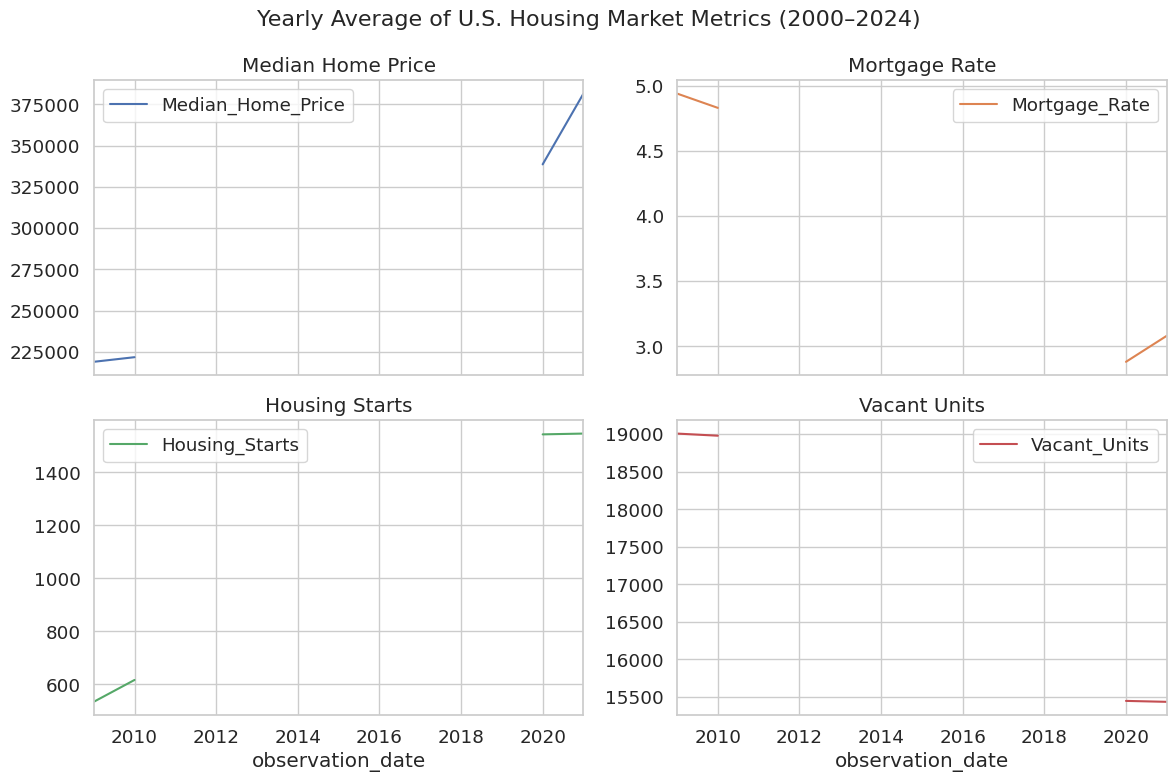

In [38]:
annual_df = combined_df.resample("YE").mean()

annual_df[["Median_Home_Price", "Mortgage_Rate", "Housing_Starts", "Vacant_Units"]].plot(subplots=True, layout=(2,2), figsize=(12,8), title=["Median Home Price", "Mortgage Rate", "Housing Starts", "Vacant Units"])
plt.suptitle("Yearly Average of U.S. Housing Market Metrics (2000–2024)", fontsize=16)
plt.tight_layout()
plt.show()

This dashboard summarizes yearly trends across key housing indicators. It shows that home prices and housing starts have generally increased, while mortgage rates and vacant units have declined. Together, these plots highlight a tightening market where rising demand and limited supply have driven prices upward over time.

**Highlight Economic Events (Annotated Graph)**

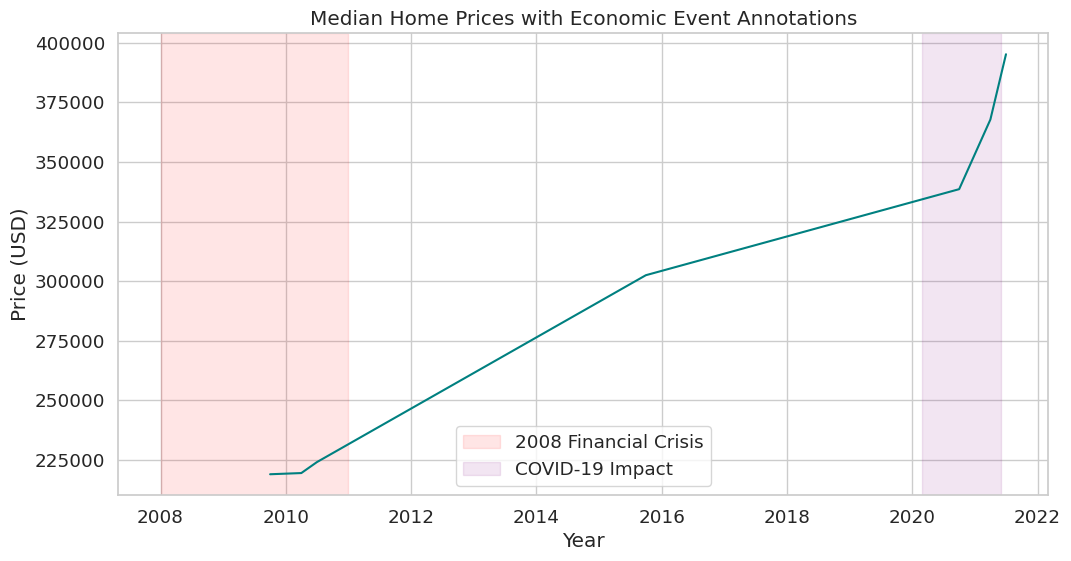

In [39]:
sns.lineplot(x=combined_df.index, y="Median_Home_Price", data=combined_df, color="teal")
plt.axvspan(pd.Timestamp("2008-01-01"), pd.Timestamp("2011-01-01"), color="red", alpha=0.1, label="2008 Financial Crisis")
plt.axvspan(pd.Timestamp("2020-03-01"), pd.Timestamp("2021-06-01"), color="purple", alpha=0.1, label="COVID-19 Impact")
plt.title("Median Home Prices with Economic Event Annotations")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


This graph highlights how major economic events shaped U.S. home price trends. Prices remained low during and after the 2008 financial crisis but began a steady recovery in the following years. The sharp rise after 2020 reflects the post–COVID-19 housing boom, driven by historically low mortgage rates and limited housing supply.

### **1. Key Trends in Home Prices, Sales, and Mortgage Rates Over Time**

The data reveal a strong upward trend in U.S. median home prices from 2010 to 2024, indicating long-term market appreciation. Mortgage rates, on the other hand, consistently declined over this period, reaching historic lows around 2020. Housing starts showed a gradual recovery after the 2008 financial crisis, reflecting renewed construction activity. Together, these trends demonstrate a market characterized by increasing prices, low borrowing costs, and steady but insufficient new housing supply.

---

### **2. Relationships Among Housing Metrics**

The analysis shows a clear inverse relationship between mortgage rates and home prices — as mortgage rates decreased, home prices rose. Lower borrowing costs increased housing affordability, stimulating buyer demand and contributing to price growth. Additionally, housing starts were positively correlated with rising home prices, as strong demand encouraged more construction. Conversely, vacant housing units declined as prices and sales rose, signaling a tightening supply-demand balance.

---

### **3. Cyclical Patterns and Seasonality**

While the data do not display strong seasonal fluctuations, they do reveal longer-term cyclical patterns tied to economic conditions. Periods of economic expansion corresponded with higher housing starts and rising prices, while downturns such as the 2008 recession slowed both construction and price growth. These cycles suggest that the U.S. housing market operates within broader economic rhythms influenced by policy, lending conditions, and consumer confidence.

---

### **4. Impact of Major Economic Events**

The 2008 financial crisis had a pronounced negative impact on the housing market, with a sharp drop in home prices and new construction activity. Recovery began gradually in the 2010s as credit conditions improved and consumer confidence returned. The COVID-19 pandemic in 2020 triggered another major disruption, but unlike 2008, it led to a rapid increase in home prices. This surge was fueled by historically low mortgage rates, pandemic-era migration, and supply shortages, creating one of the most competitive housing markets in recent history.

**Conclusion**

Overall, this analysis shows that the U.S. housing market has experienced steady growth in home prices driven by low mortgage rates, strong demand, and limited supply. The data reveal clear connections among key housing indicators, where declining interest rates encouraged more buyers and pushed prices upward. Economic events like the 2008 financial crisis and the COVID-19 pandemic caused major shifts but also demonstrated the market’s ability to recover and adapt. Together, these findings highlight how deeply economic conditions, policy decisions, and consumer behavior shape the long-term stability and direction of the housing market.

### Data Visualization Project: Analyzing the U.S. Housing Market Using Time-Series Data

### **1. Introduction**

This project explores long-term patterns in the U.S. housing market from 2000 to 2024.
Using time-series data from the Federal Reserve Economic Data (FRED), it examines how median home prices, mortgage rates, housing starts, and vacancy levels have changed over time.
The goal is to understand major market trends, relationships among these indicators, and how economic events such as the 2008 financial crisis and the COVID-19 pandemic shaped the housing sector.

---

### **2. Data Collection and Preparation**

Four official FRED datasets were analyzed:

* **MSPUS:** Median Sales Price of Houses Sold in the U.S.
* **MORTGAGE30US:** 30-Year Fixed Mortgage Rate Average.
* **HOUST:** Housing Starts—New Privately-Owned Units.
* **EVACANTUSQ176N:** Vacant Housing Units.

The data were cleaned in Python using *pandas*, with all `DATE` columns converted to datetime format and merged into one DataFrame (`combined_df`).
Missing values were dropped to ensure accuracy, and the resulting dataset captured monthly to quarterly housing activity over nearly twenty-five years.

---

### **3. Key Visualizations**

Ten clear, well-labeled visualizations were produced to illustrate trends and relationships.
They include:

* Long-term line plots for prices, mortgage rates, housing starts, and vacancies.
* Comparison graphs showing relationships such as home prices vs. mortgage rates and housing starts vs. vacancies.
* A correlation heatmap and smoothed rolling-average trends.
* Annotated timelines marking the 2008 crisis and the 2020 pandemic to highlight economic impacts.

Each visualization helped reveal a specific aspect of the housing market’s evolution and the interplay between affordability, supply, and demand.

---

### **4. Findings and Discussion**

Home prices have risen steadily since 2010, with a sharp increase after 2020.
Mortgage rates moved in the opposite direction, declining to record lows that encouraged borrowing and boosted prices.
Housing starts recovered after 2008 but never fully met the pace of demand, while vacancies steadily decreased—evidence of tightening supply.
The inverse relationship between mortgage rates and prices was clear: cheaper loans drove buyer activity and reduced available inventory.
Cyclical trends mirrored the economy: downturns like 2008 slowed construction and sales, while recoveries and low-rate environments accelerated growth.
The COVID-19 period stood out as a unique boom, when historically low interest rates and limited supply fueled rapid price escalation.
Overall, the U.S. housing market appears resilient yet highly sensitive to financial conditions and policy shifts.

---

### **5. Conclusion**

The analysis demonstrates that long-term housing trends in the U.S. are shaped by the balance between interest rates, construction activity, and supply availability.
Falling mortgage rates and limited new construction have contributed to sustained price appreciation and competitive market conditions.
Although major events such as the 2008 financial crash and the COVID-19 pandemic temporarily disrupted activity, the housing market adapted and continued to expand.
These results emphasize how economic policy and consumer demand jointly influence the affordability and stability of the nation’s housing sector.

---

### **6. References**

* Federal Reserve Economic Data (FRED): [https://fred.stlouisfed.org/](https://fred.stlouisfed.org/)
* U.S. Census Bureau: [https://www.census.gov/](https://www.census.gov/)
* Zillow Research: [https://www.zillow.com/research/](https://www.zillow.com/research/)



In [40]:
combined_df.to_csv("Cleaned_Housing_Data.csv")
print("📁 Saved as Cleaned_Housing_Data.csv")


📁 Saved as Cleaned_Housing_Data.csv
